<img src="escudo_utfsm.gif" style="float:right;height:100px">
<img src="IsotipoDIisocolor.png" style="float:left;height:100px">
<p style="font-size:x-large;text-align:center;margin-left:200px;margin-right:200px;"><b>Tarea 5</b></p>
<p style="font-size:x-large;text-align:center;margin-left:200px;margin-right:200px;">ILI286 - Computación Científica II</p>
<p style="text-align:center;margin-left:200px;margin-right:200px;">
    <b>Alex Arenas Fuentes</b><br>
    Rol USM 2973505-0<br>
    <a href="mailto:alex.arenasf@alumnos.usm.cl">alex.arenasf@alumnos.usm.cl</a>
</p>

_Junio 2017_

# Tabla de Contenidos
* [1.- Objetivos](#obj)
* [2.- Introducción](#i)
* [3.- Desarrollo y análisis de resultados](#d)
* [3.1.- Ecuación de calor en 2D](#heateq)
* [3.2.- Aplicación de la ecuación de calor en imágenes](#heateq-image)
* [3.3.- Otra aplicación de la ecuación de calor](#revheateq-image)
* [4.- Conclusiones](#c)
* [4.- Referencias](#r)

<div id='obj' />
# 1. Objetivos

Los objetivos de esta tarea son:

* Estudio de las técnicas basadas en diferencias finitas.
* Aplicación de diferencias finitas en un problema con 3 dimensiones (2 espaciales y 1 temporal).
* Resolución de la ecuación de calor y aplicación en el procesamiento de imágenes.

<div id='i' />
# 2. Introducción

Las ecuaciones diferenciales parciales (EDP) permiten modelar diversos problemas del mundo real. 

La ecuación de calor corresponde a una EDP del tipo parabólico, donde se tiene una componente temporal y una espacial. Estos problemas cuentan con una condición inicial además se sabe lo que sucede en las fronteras de los dominios del espacio.

Para conocer el comportamiento del espacio en un instante de tiempo, es necesario conocer lo que sucede en un instante de tiempo anterior en la zona cercana del espacio.

<div id='d' />
# 3. Desarrollo y análisis de resultados

Librerías usadas en la tarea

In [1]:
# Libraries
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import numpy as np
from scipy.misc import factorial
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import Rectangle
from IPython.display import display, Latex, Math
from mpl_toolkits.mplot3d import Axes3D
from PIL import Image
import gc

<div id='heateq' />
# 3.1. Ecuación de calor en 2D (30 pts)

Considere la siguiente ecuación diferencial parcial, correspondiente a la ecuación de calor definida en un dominio $(x,y) \in [0,10]^2$ y $0 < t < T_{\max}$:

\begin{align}
u_t &= \alpha\, \Delta u \\
c\cdot u(\Gamma, t) + (1-c)\cdot\dfrac{\partial u}{\partial \mathbf{n}}(\Gamma,t) &= 0, \quad t > 0, c \in (0,1) \\
u(x,y,0) = f(x,y) &= \dfrac{x\,y\,(x-10)\,(y-10)}{x+3}, \quad (x,y) \in [0,10]^2
\end{align}

donde $u(\Gamma, t)$ es la función $u$ evaluada en la frontera $\Gamma$ del dominio y $\dfrac{\partial u}{\partial \mathbf{n}}$ es el gradiente de $u$ producto punto el vector normal $\mathbf{n}$ apuntando hacia fuera del dominio.

<b>1) Aplique diferencias finitas en la <i>PDE</i> y expréselo en términos de los índices $i,j,k$ al aplicar un esquema explícito, donde $i$ está relacionado con la discretización de la variable $x$, $j$ está relacionado con la variable $y$ y $k$ está relacionado con el tiempo $t$.</b>

\begin{align}
u_t &= \alpha\, \Delta u \\
\frac{\partial u}{\partial t}(x,y,t) &= \alpha \left( \frac{\partial^2 u}{\partial x^2}(x,y,t) + \frac{\partial^2 u}{\partial y^2}(x,y,t) \right) \\
\end{align}

Sea 
\begin{equation}
u(x_i,y_j,t_k)=w_{i,j,k} \hspace{2cm} t>0, (x,y)\in[0,10]^2
\end{equation}

con
\begin{align}
x_i &= i\Delta x & i=0,1,2,...,N_x \\ 
y_j &= j\Delta y & j=0,1,2,...,N_y  \\
t_k &= k\Delta t & k=0,1,2,...,N_t  \\
\end{align}

Y $\Delta x$, $\Delta y$, $\Delta t$ parámetros.


Además, usando el esquema explícito
\begin{align}
\frac{\partial u}{\partial t} (x_i,y_j,t_k) &= \frac{w_{i,j,k+1}-w_{i,j,k}}{\Delta t} + O(\Delta t) \\
\frac{\partial^2 u}{\partial x^2} (x_i,y_j,t_k) &= \frac{w_{i+1,j,k}-2w_{i,j,k}+w_{i-1,j,k}}{\Delta x^2} + O(\Delta x^2) \\
\frac{\partial^2 u}{\partial y^2} (x_i,y_j,t_k) &= \frac{w_{i,j+1,k}-2w_{i,j,k}+w_{i,j-1,k}}{\Delta y^2} + O(\Delta y^2) \\
\end{align}

Por lo tanto, la discretización queda

\begin{align}
\frac{\partial u}{\partial t}(x,y,t) &= \alpha \left( \frac{\partial^2 u}{\partial x^2}(x,y,t) + \frac{\partial^2 u}{\partial y^2}(x,y,t) \right) \\
\frac{w_{i,j,k+1}-w_{i,j,k}}{\Delta t} &= \alpha \left( \frac{w_{i+1,j,k}-2w_{i,j,k}+w_{i-1,j,k}}{\Delta x^2} + \frac{w_{i,j+1,k}-2w_{i,j,k}+w_{i,j-1,k}}{\Delta y^2} \right) \\
w_{i,j,k+1}-w_{i,j,k} &= \frac{\alpha\Delta t}{\Delta x^2} \left( w_{i+1,j,k}-2w_{i,j,k}+w_{i-1,j,k} \right) + \frac{\alpha\Delta t}{\Delta y^2} \left(  w_{i,j+1,k}-2w_{i,j,k}+w_{i,j-1,k} \right) \\
\end{align}

Sea
\begin{align}
\tau &= \frac{\alpha\Delta t}{\Delta x^2}  & \phi &= \frac{\alpha\Delta t}{\Delta y^2}  \\
\end{align}

Finalmente, el tiempo $k+1$ queda
\begin{align}
w_{i,j,k+1} &= \tau \, w_{i-1,j,k} + \phi\, w_{i,j-1,k} + (1-2\tau -2\phi) \, w_{i,j,k} + \phi \, w_{i,j+1,k} + \tau \, w_{i+1,j,k}  \\
\end{align}

Además, la condición inicial queda definida por

\begin{align}
u(x,y,0) &= \dfrac{x\,y\,(x-10)\,(y-10)}{x+3}, \quad (x,y) \in [0,10]^2 \\
w_{i,j,0} &= \dfrac{x_i\,y_j\,(x_i-10)\,(y_j-10)}{x_i+3} \\
w_{i,j,0} &= \dfrac{(i\Delta x)\,(j\Delta y)\,(i\Delta x-10)\,(j\Delta y-10)}{i\Delta x+3} 
\end{align}



<b>2) Determine el tipo de condición de frontera del problema. Explique como utilizar esta condición y la condición inicial para resolver numéricamente el problema. Además indique qué significa que $c = 0$ y $c = 1$.</b>

Las condiciones de frontera se describen en la siguiente ecuación

\begin{align}
c\cdot u(\Gamma, t) + (1-c)\cdot\dfrac{\partial u}{\partial \mathbf{n}}(\Gamma,t) &= 0, \quad t > 0, c \in (0,1) \\
\end{align}

Y pueden verse en el siguiente gráfico.


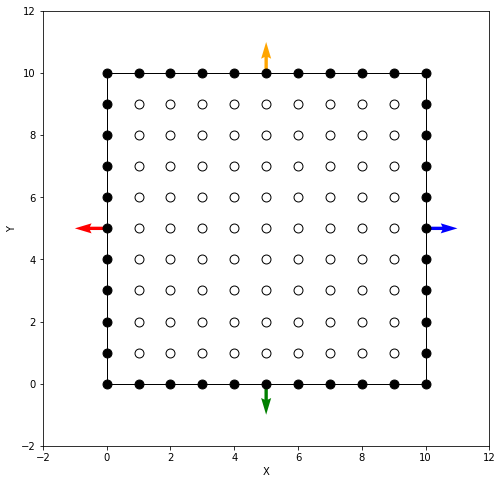

In [2]:
fig = plt.figure(figsize=(8,8))

# Dibujar dominio
currentAxis = plt.gca()
currentAxis.add_patch(Rectangle((0, 0), 10, 10, edgecolor='black', fill=False))

# Dibujar normales a la frontera
soa = np.array([[5, 0, 0, -1],[10,5,1,0],[5, 10, 0, 1],[0, 5, -1, 0]])
X, Y, U, V = zip(*soa)
currentAxis.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1, color=['green','blue','orange','red'])

# Dibujar discretización
ax = fig.add_subplot(111)
for i in range(0,11):
    for j in range(0,11):
        color = 'black'
        if i not in [0,10] and j not in [0,10]:
            color = 'white'
        ax.scatter(i,j,c=color,edgecolor='black', linewidth='1',s=80)

ax.set_xlabel('X')
ax.set_ylabel('Y')

ax.set_xlim([-2, 12])
ax.set_ylim([-2, 12])


plt.show()

El espació formado por (x,y) es un cuadrado. Se muestra una discretización de puntos para un tiempo $k$ distinto del inicial, donde los puntos negros corresponden a las 4 fronteras con condiciones conocidas. Los puntos blancos no son conocidos y deben calcularse a partir de algunos puntos del tiempo $k-1$.

Las 4 flechas corresponden a 4 vectores normales a las fronteras: derecha <span style="color:blue">azul</span> $(1,0)$, arriba <span style="color:orange">naranjo</span> $(0,1)$, izquierda <span style="color:red">rojo</span> $(-1,0)$, abajo <span style="color:green">verde</span> $(0,-1)$.




Cuando $c=0$, las condiciones de borde son del tipo Neumann, pues quedan en función de la dereivada de $u$

\begin{align}
\dfrac{\partial u}{\partial \mathbf{n}}(\Gamma,t) &= 0, \quad t > 0 \\
\end{align}

<b>Frontera Derecha: $x=10,\quad y\in[0,10], \quad t > 0$</b>

\begin{align}
\left(\dfrac{\partial u}{\partial x}(10,y,t),\dfrac{\partial u}{\partial y}(10,y,t) \right) \cdot(1,0) &= 0 \\
\dfrac{\partial u}{\partial x}(10,y,t) &= 0\\
\end{align}

Usando Backward Difference

\begin{align}
\dfrac{w_{N_x,j,k}-w_{N_x-1,j,k}}{\Delta x} &= 0 \\
\\
-w_{N_x-1,j,k}+w_{N_x,j,k} &=0 \\
\end{align}


<b>Frontera Arriba: $y=10,\quad  x\in[0,10], \quad t > 0$</b>

\begin{align}
\left(\dfrac{\partial u}{\partial x}(x,10,t),\dfrac{\partial u}{\partial y}(x,10,t) \right) \cdot(0,1) &= 0 \\
\dfrac{\partial u}{\partial y}(x,10, t) &= 0\\
\end{align}

Usando Backward Difference

\begin{align}
\dfrac{w_{i,N_y,k}-w_{i,N_y-1,k}}{\Delta y} &= 0 \\
\\
-w_{i,N_y-1,k}+w_{i,N_y,k} &=0 \\
\end{align}


<b>Frontera Izquierda:</b> $x=0,\quad y\in[0,10], \quad t > 0$

\begin{align}
\left(\dfrac{\partial u}{\partial x}(0,y,t),\dfrac{\partial u}{\partial y}(0,y,t) \right) \cdot(-1,0) &= 0 \\
-\dfrac{\partial u}{\partial x}(0,y,t) &= 0\\
\end{align}

Usando Forward Difference

\begin{align}
-\dfrac{w_{1,j,k}-w_{0,j,k}}{\Delta x} &= 0  \\
\\
w_{0,j,k}-w_{1,j,k} &= 0  \\
\end{align}

<b>Frontera Abajo: $y=0,\quad  x\in[0,10], \quad t > 0$</b>

\begin{align}
\left(\dfrac{\partial u}{\partial x}(x,0,t),\dfrac{\partial u}{\partial y}(x,0,t) \right) \cdot(0,-1) &= 0 \\
-\dfrac{\partial u}{\partial y}(x,0, t) &= 0\\
\end{align}

Usando Forward Difference

\begin{align}
-\dfrac{w_{i,1,k}-w_{i,0,k}}{\Delta y}  &= 0 \\
\\
w_{i,0,k}-w_{i,1,k} &= 0 \\
\end{align}

Cuando $c=1$, las condiciones de borde son del tipo Dirichlet, pues quedan en función de $u$

\begin{align}
u(\Gamma, t) &= 0, \quad t > 0 \\
\end{align}

<b>Frontera Derecha: $x=10,\quad y\in[0,10], \quad t > 0$</b>

\begin{align}
u(10,y, t)  &= 0 \\
\end{align}

Discretizada como

\begin{align}
w_{N_x,j,k} &= 0 \\
\end{align}

<b>Frontera Arriba: $y=10,\quad  x\in[0,10], \quad t > 0$</b>

\begin{align}
u(x,10, t)  &= 0 \\
\end{align}

Discretizada como

\begin{align}
w_{i,N_y,k} &= 0 \\
\end{align}

<b>Frontera Izquierda:</b> $x=0,\quad y\in[0,10], \quad t > 0$

\begin{align}
u(0,y, t)  &= 0 \\
\end{align}

Discretizada como

\begin{align}
w_{0,j,k} &= 0 \\
\end{align}

<b>Frontera Abajo: $y=0,\quad  x\in[0,10], \quad t > 0$</b>

\begin{align}
u(x,0, t)  &= 0 \\
\end{align}

Discretizada como

\begin{align}
w_{i,0,k} &= 0 \\
\end{align}

Cuando $0<c<1$, las condiciones son de Robin, ya que serán una combinación de Neumann y Dirichlet

<b>Frontera Derecha: $x=10,\quad y\in[0,10], \quad t > 0, \quad c \in (0,1)$</b>

\begin{align}
c\cdot u(10,y, t) + (1-c) \left(\dfrac{\partial u}{\partial x}(10,y,t),\dfrac{\partial u}{\partial y}(10,y,t) \right) \cdot(1,0) &= 0 \\
c\cdot u(10,y, t) + (1-c)\cdot \dfrac{\partial u}{\partial x}(10,y,t) &= 0\\
c\cdot u(10,y, t) &= - (1-c)\cdot \dfrac{\partial u}{\partial x}(10,y,t) \\
-\frac{c}{1-c}\cdot u(10,y, t) &= \dfrac{\partial u}{\partial x}(10,y,t)
\end{align}

Usando Backward Difference y considerando $\sigma=\dfrac{c}{1-c}$, con $0<c<1$

\begin{align}
-\sigma\cdot w_{N_x,j,k} &= \dfrac{w_{N_x,j,k}-w_{N_x-1,j,k}}{\Delta x} \\
-\sigma \Delta x \cdot w_{N_x,j,k} &= w_{N_x,j,k}-w_{N_x-1,j,k} \\
\\
0 &= (1+\sigma \Delta x) \, w_{N_x,j,k} - w_{N_x-1,j,k}
\end{align}




<b>Frontera Arriba: $y=10,\quad  x\in[0,10], \quad t > 0, \quad c \in (0,1)$</b>

\begin{align}
c\cdot u(x,10, t) + (1-c) \left(\dfrac{\partial u}{\partial x}(x,10,t),\dfrac{\partial u}{\partial y}(x,10,t) \right) \cdot(0,1) &= 0 \\
c\cdot u(x,10, t) + (1-c)\cdot \dfrac{\partial u}{\partial y}(x,10, t) &= 0\\
c\cdot u(x,10, t) &= - (1-c)\cdot \dfrac{\partial u}{\partial y}(x,10, t) \\
-\frac{c}{1-c}\cdot u(x,10, t) &= \dfrac{\partial u}{\partial y}(x,10, t)
\end{align}

Usando Backward Difference y considerando $\sigma=\dfrac{c}{1-c}$, con $0<c<1$

\begin{align}
-\sigma\cdot w_{i,N_y,k} &= \dfrac{w_{i,N_y,k}-w_{i,N_y-1,k}}{\Delta y} \\
-\sigma \Delta y \cdot w_{i,N_y,k} &= w_{i,N_y,k}-w_{i,N_y-1,k} \\
\\
0 &= (1+\sigma \Delta y) \, w_{i,N_y,k} - w_{i,N_y-1,k}
\end{align}



<b>Frontera Izquierda: $x=0,\quad y\in[0,10], \quad t > 0, \quad c \in (0,1)$</b>

\begin{align}
c\cdot u(0,y, t) + (1-c) \left(\dfrac{\partial u}{\partial x}(0,y,t),\dfrac{\partial u}{\partial y}(0,y,t) \right) \cdot(-1,0) &= 0 \\
c\cdot u(0,y, t) - (1-c)\cdot \dfrac{\partial u}{\partial x}(0,y,t) &= 0\\
c\cdot u(0,y, t) &= (1-c)\cdot \dfrac{\partial u}{\partial x}(0,y,t) \\
\frac{c}{1-c}\cdot u(0,y, t) &= \dfrac{\partial u}{\partial x}(0,y,t)
\end{align}

Usando Forward Difference y considerando $\sigma=\dfrac{c}{1-c}$, con $0<c<1$

\begin{align}
\sigma\cdot w_{0,j,k} &= \dfrac{w_{1,j,k}-w_{0,j,k}}{\Delta x} \\
\sigma \Delta x \cdot w_{0,j,k} &= w_{1,j,k}-w_{0,j,k} \\
\\
0 &= w_{1,j,k} - (1+\sigma \Delta x) \, w_{0,j,k}
\end{align}



<b>Frontera Abajo: $y=0,\quad  x\in[0,10], \quad t > 0, \quad c \in (0,1)$</b>

\begin{align}
c\cdot u(x,0, t) + (1-c) \left(\dfrac{\partial u}{\partial x}(x,0,t),\dfrac{\partial u}{\partial y}(x,0,t) \right) \cdot(0,-1) &= 0 \\
c\cdot u(x,0, t) - (1-c)\cdot \dfrac{\partial u}{\partial y}(x,0, t) &= 0\\
c\cdot u(x,10, t) &= (1-c)\cdot \dfrac{\partial u}{\partial y}(x,0, t) \\
\frac{c}{1-c}\cdot u(x,0, t) &= \dfrac{\partial u}{\partial y}(x,0, t)
\end{align}

Usando Forward Difference y considerando $\sigma=\dfrac{c}{1-c}$, con $0<c<1$

\begin{align}
\sigma\cdot w_{i,0,k} &= \dfrac{w_{i,1,k}-w_{i,0,k}}{\Delta y} \\
\sigma \Delta y \cdot w_{i,0,k} &= w_{i,1,k}-w_{i,0,k} \\
\\
0 &= w_{i,1,k} - (1+\sigma \Delta y) \, w_{i,0,k}
\end{align}

3) Construya el código para resolver el problema. Aplique operaciones vectorizadas. Tenga en consideración los problemas de estabilidad que podrían surgir de los valores de $\Delta x, \Delta y, \Delta t$. Considere $\alpha = 1$ y un $T_\max = 5$.

In [39]:
# Calcula deltas x, y, t
def alex_calcularDeltas(Nx,Ny,Nt,DomX,DomY,DomT,alpha=1):
    dx = (DomX[1]-DomX[0])/(Nx)
    dy = (DomY[1]-DomY[0])/(Ny)
    dt = (DomT[1]-DomT[0])/(Nt)
    
    # Verificar estabilidad
    sx = (alpha*dt)/(dx**2)
    sy = (alpha*dt)/(dy**2)
    
    if sx >= 0.5:
        raise Exception('Los parámetros dx y dt no son estables segun alpha, Nx y Nt elegidos.' 
                        +' Se debe cumplir que '+str(sx)+' < 0.5')
    if sy >= 0.5:
        raise Exception('Los parámetros dy y dt no son estables segun alpha, Ny y Nt elegidos.'
                        +' Se debe cumplir que '+str(sy)+' < 0.5')
    
    return (dx,dy,dt)

# Cambio de coordenadas (i,j)->(n)
def alex_vectorize(i_max,j_max):
    n = 0
    
    ij_to_n = np.empty([i_max+1,j_max+1],dtype='uint')
    n_to_ij = np.empty([(i_max+1)*(j_max+1),2],dtype='uint')
    
    for j in range(0,j_max+1):
        for i in range(0,i_max+1):
            #print("(",i,",",j,")=",n)
            ij_to_n[i][j] = int(n)
            n_to_ij[n][0] = int(i)
            n_to_ij[n][1] = int(j)
            n+=1

    return (ij_to_n,n_to_ij)

# Calcula condición inicial con una función f y la vectoriza
def alex_condicionInicial(f,Nx,Ny,dx,dy,ij_to_n):
    # Calcular t=0
    # (i,j,k) -> (k,n)
    V = np.zeros([(Ny+1)*(Nx+1)])

    for i in range(0,Nx+1):
        for j in range(0,Ny+1):
            V[ij_to_n[i][j]] = f(i*dx,j*dy)
    
    return V

# Calcula condición inicial a partir de un espacio (x,y)
def alex_condicionInicial_Im(Im_0,Nx,Ny,dx,dy,ij_to_n):
    # Calcular t=0
    # (i,j,k) -> (k,n)
    V = np.zeros([(Ny+1)*(Nx+1)])

    for i in range(0,Nx+1):
        for j in range(0,Ny+1):
            V[ij_to_n[i][j]] = Im_0[i][j]
    
    return V

# Funciones que calculan las matrices A y M para resolver el siguiente sistema
# A v = b
# Donde b es la discretización en el tiempo anterior: b = M v_anterior

# Calcular M matriz de coeficientes de la discretización
def alex_matrizM(Nx,Ny,dx,dy,dt,ij_to_n,alpha):
    M = np.zeros([(Nx+1)*(Ny+1),(Nx+1)*(Ny+1)])
    
    tau = (alpha*dt)/dx**2
    phi = (alpha*dt)/dy**2

    for i in range(1,Nx):
        for j in range(1,Ny):
            n = ij_to_n[i][j]
            M[n][n-4] = tau
            M[n][n-1] = phi
            M[n][n] = (1-2*tau-2*phi)
            M[n][n+1] = phi
            M[n][n+4] = tau
    
    return M

# Calcular Matriz A de condiciones de frontera
def alex_matrizA(Nx,Ny,dx,dy,ij_to_n,c):
    A = np.identity((Nx+1)*(Ny+1))
    # Frontera abajo
    j = 0
    for i in range(0,Nx+1):    
        #(i,j)->(n)
        n = ij_to_n[i][j]
        m = ij_to_n[i][j+1]    

        if c == 0:
            A[n][n] = 1
            A[n][m] = -1
        elif c == 1:
            A[n][n] = 1
        else:
            sigma = c/(1.0-c)

            A[n][n] = -(1+sigma*dy)
            A[n][m] = 1

    # Frontera arriba
    j = Ny
    for i in range(0,Nx+1):    
        #(i,j)->(n)
        n = ij_to_n[i][j]
        m = ij_to_n[i][j-1]    

        if c == 0:
            A[n][n] = 1
            A[n][m] = -1
        elif c == 1:
            A[n][n] = 1
        else:
            sigma = c/(1.0-c)

            A[n][n] = (1+sigma*dy)
            A[n][m] = -1


    # Frontera izquierda    
    i = 0
    for j in range(1,Ny):
        #(i,j)->(n)
        n = ij_to_n[i][j]
        m = ij_to_n[i+1][j]    

        if c == 0:
            A[n][n] = 1
            A[n][m] = -1
        elif c == 1:
            A[n][n] = 1
        else:
            sigma = c/(1.0-c)

            A[n][n] = -(1+sigma*dx)
            A[n][m] = 1


    # Frontera derecha    
    i = Nx
    for j in range(1,Ny):
        #(i,j)->(n)
        n = ij_to_n[i][j]
        m = ij_to_n[i-1][j]    

        if c == 0:
            A[n][n] = 1
            A[n][m] = -1
        elif c == 1:
            A[n][n] = 1
        else:
            sigma = c/(1.0-c)

            A[n][n] = (1+sigma*dx)
            A[n][m] = -1
    
    return A
            
def alex_resolverEDPParabolica(Nx,Ny,Nt,DomX,DomY,Tmax,u_t0,alpha,c):
    ij_to_n, n_to_ij = alex_vectorize(Nx,Ny)
    DomT = (0,Tmax)
    dx,dy,dt = alex_calcularDeltas(Nx,Ny,Nt,DomX,DomY,DomT,alpha)

    W_0 = alex_condicionInicial(u_t0,Nx,Ny,dx,dy,ij_to_n)
    W = np.zeros((Nx+1)*(Ny+1))
    
    M = alex_matrizM(Nx,Ny,dx,dy,dt,ij_to_n,alpha)
    A = alex_matrizA(Nx,Ny,dx,dy,ij_to_n,c)
    
    b = np.dot(M,W_0)

    for t in range(1,Nt+1):
        W = np.linalg.solve(A,b)
        b = np.dot(M,W)
    
    return W

In [40]:
Tmax = 5

Nx = 7
Ny = 7
Nt = Tmax

DomX = (0,10)
DomY = (0,10)

u_t0 = lambda x,y: (x*y*(x-10)*(y-10))/(x+3)
alpha = 1

# Probar solución
# W = alex_resolverEDPParabolica(Nx,Ny,Nt,DomX,DomY,Tmax,u_t0,alpha,c)

4) Su solución debería ser un "cubo" de tamaño $(N_x, N_y, N_t)$. Muestre gráficamente mediante <i>widgets</i> con 2 <i>slides</i> la solución encontrada (donde el primer <i>slide</i> modifica el momento $t$ visualizado y el segundo <i>slide</i> modifica el coeficiente $c$ de la condición). Use un gráfico 3D para visualizar la forma de la solución.

In [41]:
def alex_plotSolution(t,c):
    W = alex_resolverEDPParabolica(Nx,Ny,Nt,DomX,DomY,t,u_t0,alpha,c)
    
    ij_to_n, n_to_ij = alex_vectorize(Nx,Ny)

    X = list()
    Y = list()
    Z = list()

    n = 0
    for w in W:
        i = n_to_ij[n][0]
        j = n_to_ij[n][1]

        X.append(i)
        Y.append(j)
        Z.append(w)

        n+=1

    fig = plt.figure(figsize=(12,8))
    ax = fig.gca(projection='3d')

    ax.plot_wireframe(X, Y, Z)

    plt.show()

interact(alex_plotSolution, t=widgets.IntSlider(min=0,max=Tmax,step=1,value=0), c=widgets.FloatSlider(min=0,max=1,step=0.1,value=1))

<function __main__.alex_plotSolution>

<div id='heateq-image' />
# 3.2. Aplicación de la ecuación de calor en imágenes: <i> Blurring </i> (40 pts)

La ecuación de calor logra una difusión, en base a las condiciones entregadas. Aplicado en imágenes logramos un efecto de <i> blur </i> en la imagen. Consideremos el siguiente problema:

\begin{align}
    u_t &= \alpha\,\Delta u \\
    u(x,y,0) &= I(x,y) \\
    c\cdot u(\Gamma, t) + (1-c)\cdot\dfrac{\partial u}{\partial \mathbf{n}}(\Gamma,t) &= 0, \quad t > 0, c \in (0,1)
\end{align}

donde $I(x,y)$ es una imagen. Consideremos $\alpha = 1$ por simplicidad.

1) Cargue la imagen <i>mandrill.png</i> (adjunta en esta tarea) como escala de grises, normalice sus valores (respecto a la escala de grises) y transfórmela a un <i>array</i> de <i>Numpy</i>. Visualice la imagen y su dimensión.



Dimensiones(px) 
 x = 100 
 y = 100


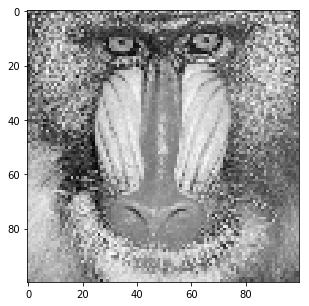

In [54]:
def alex_mostrarImagen(im):
    plt.figure(figsize=(15,5))
    
    plt.subplot(1,2,1)
    plt.imshow(im, cmap='gray')
        
    plt.show()
    
def alex_mostrarImagenDesdeArray(im_array):
    plt.figure(figsize=(15,5))
    
    plt.subplot(1,2,1)
    plt.imshow(im_array, cmap='gray')
        
    plt.show()


image = Image.open('mandrill.png').convert('LA')
width, height = image.size

alpha = 1
Tmax = 10

Nx = width-1
Ny = height-1
Nt = Tmax

DomX = (0,width)
DomY = (0,height)

ij_to_n, n_to_ij = alex_vectorize(Nx,Ny)

Im_0 = np.zeros([height,width])

im_array = np.array(image)

# Guardar escala de grises sin componente de transparencia
for y in range(0,height):
    for x in range(0,width):
        gray,transparency = im_array[y][x]
        Im_0[x][y] = gray
        
    
print("Dimensiones(px)","\n","x =",width,"\n","y =",height)
alex_mostrarImagenDesdeArray(Im_0.T)

In [55]:
np.asarray(image).shape

(100, 100, 2)

2) Programe una función que resuelva la ecuación de calor propuesta. Para este punto es importante considerar algunos aspectos:
* La ecuación se resuelve sobre un dominio, y sobre este dominio debemos aplicar valores $\Delta x, \Delta y$ que se estimen convenientes. Para este problema el dominio es entregado por la imagen, por lo que tenemos cierta "flexibilidad" para escogerlo. Si la dimensión de la imagen es $(N,M)$ entonces pueden tomarse, convenientemente, el dominio espacial como $[0,N-1]\times[0,M-1]$ y con esto tomar $(N,M)$ puntos equiespaciados por $\Delta x = 1, \Delta y = 1$. Es decir estamos tomando como cada punto de la "discretización" como un píxel de la imagen.
* Recuerde que la imagen representa su función de condición inicial. Dado lo explicado anteriormente, si generamos $N$ y $M$ puntos y denotamos la imagen por $I(x,y)$, tenemos que $I(x_i,y_j)$ equivale al píxel $(i,j)$ (recordar que estamos tomando $\Delta x = 1, \Delta y = 1$.
* Tenga en consideración los valores necesarios para que el problema sea estable.
* El efecto de blur es progresivo. Considerando que $t$ está acotado por $0 < t \leq T_\max$, esto quiere decir que mientras más grande sea $T_\max$, más tiempo se está entregando para que la imagen se vea afectada por el efecto de <i>blur</i>. Para visualizar esto considere $T_\max = 30$.

Se usan las mismas funciones que para la pregunta 1, excepto esta.

In [56]:
# Igual que en pregunta 1, solo cambia la forma de generar la condición inicial
def alex_resolverEDPParabolica_Im(Nx,Ny,Nt,DomX,DomY,Tmax,u_t0,alpha,c):
    ij_to_n, n_to_ij = alex_vectorize(Nx,Ny)
    DomT = (0,Tmax)
    dx,dy,dt = alex_calcularDeltas(Nx,Ny,Nt,DomX,DomY,DomT,alpha)

    W = np.zeros((Nx+1)*(Ny+1))
    W_0 = alex_condicionInicial_Im(u_t0,Nx,Ny,dx,dy,ij_to_n)
    
    M = alex_matrizM(Nx,Ny,dx,dy,dt,ij_to_n,alpha)
    A = alex_matrizA(Nx,Ny,dx,dy,ij_to_n,c)
    
    b = np.dot(M,W_0)

    for t in range(1,Nt+1):
        W = np.linalg.solve(A,b)
        b = np.dot(M,W)
    
    return W

3) Aplique su código a la imagen. Luego de obtener la solución utilize un <i> widget </i> con dos <i>slides</i>: el primero para visualizar la imagen en cada tiempo obtenido y el segundo variando el parámetro $c \in (0,1)$. ¿Se consigue el efecto de <i> blur </i> en la imagen?.

In [57]:
def alex_plotImagen(t,c):
    W = alex_resolverEDPParabolica_Im(Nx,Ny,Nt,DomX,DomY,t,Im_0,alpha,c)
    
    ij_to_n, n_to_ij = alex_vectorize(Nx,Ny)
    
    reconstruir_im=np.zeros([(Nx+1),(Ny+1)])

    n = 0
    for w in W:
        i = n_to_ij[n][0]
        j = n_to_ij[n][1]

        reconstruir_im[i][j]=w
        
        n+=1

    alex_mostrarImagenDesdeArray(reconstruir_im.T)

interact(alex_plotImagen, t=widgets.IntSlider(min=0,max=Tmax,step=1,value=0), c=widgets.FloatSlider(min=0,max=1,step=0.1,value=1))

<function __main__.alex_plotImagen>

4) Explique el efecto del parámetro $c$ en la imagen. ¿cuál es el $c$ óptimo para obtener un buen efecto de <i>blur</i>?.

<div id='revheateq-image' />
# 3.3. Otra aplicación de la ecuación de calor: <i> Deblur </i> (30 pts)

En la sección anterior pudo aplicar la ecuación de calor a una imagen. **¿Será este proceso reversible?**. Dicho de otra manera, si tengo una imagen con <i>blur</i>, ¿puedo recuperar la imagen original?. Este problema se plantea de la siguiente manera:

\begin{align}
u_t &= \alpha\, \Delta u\\
u(x,y,\tau) &= I_\tau(x,y)\\
c\cdot u(\Gamma, t) + (1-c)\cdot\dfrac{\partial u}{\partial \mathbf{n}}(\Gamma,t) &= 0, \quad t > 0, c \in (0,1)
\end{align}

donde $I_\tau(x,y)$ es la imagen procesada o con efecto <i>blur</i>. Esto es un problema de valor final --- recuerde
que nosotros hemos trabajado problemas de valor incial. En este contexto, tenemos que $\tau$ es el tiempo en cuestión (tiempo hasta donde avanzó la ecuación de calor). Entonces estamos buscando la condición incial $I(x,y)$ que me lleva a $I_\tau(x,y)$. Este problema puede reducirse a la siguiente <i>PDE</i>:

\begin{align}
u_t &= -\widetilde{\alpha}\,\Delta u\\
u(x,y,0) &= I_\tau(x,y)\\
c\cdot u(\Gamma, t) + (1-c)\cdot\dfrac{\partial u}{\partial \mathbf{n}}(\Gamma,t) &= 0, \quad t > 0, c \in (0,1)
\end{align}

Esto es posible en cierta medida, para saltos pequeños de tiempo. Es decir, **¡debemos retroceder el tiempo!**

1) Carge la imagen adjunta llamada <b>blurred.tiff</b> y visualícela utilizando la función adjunta en esta sección. Indique que significa el histograma que entrega.


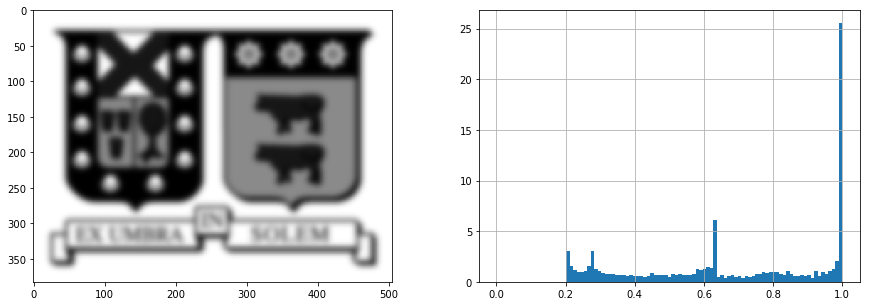

In [58]:
blurred_image = Image.open('blurred.tiff')

# Función auxiliar para mostrar la imagen y el histograma. Los parámetros k y dt son entregados por el slide.
#  im: imagen a mostrar.
def show_imhist(im):
    plt.figure(figsize=(15,5))
    
    plt.subplot(1,2,1)
    # Mostrar imagen en tiempo k
    plt.imshow(im, cmap='gray')
    
    # Mostrar histograma
    plt.subplot(1,2,2)
    bins=np.linspace(0,1,100)
    plt.hist(im.flatten() ,bins=bins, normed=True)
    plt.grid(True)
    
    plt.show()

show_imhist(np.array(blurred_image))

El histograma muestra la frecuencia de los tonos de gris en los pixeles de la imágen, donde 0 (0%) es negro y 1 (100%) es blanco.

2) Construya un código para resolver numéricamente este problema. En esta parte, la imagen adjunta será la condición inicial. Considere $\widetilde{\alpha} = 1$ en la segunda PDE o equivalentemente $\alpha=-1$ en la primera PDE. Considere el valor de $c$ óptimo, considerando lo obtenido en la sección anterior. Además considere $\tau = 30$ (o $T_\max = 30$ usando la notación de los problemas anteriores).

3) Resuelva el problema y visualícelo utilizando un <i> widget </i> con 2 <i>slides</i>: el primero para variar el tiempo visualizado y el segundo para variar el parámetro $\Delta t$. Utilice la función adjunta para visualizar la imagen y el histograma. ¿Se puede revertir el efecto en la imagen?, ¿qué ocurre después de harto tiempo?, ¿Qué ocurre con la distribución (entragada por el histograma) a medida que avanza el tiempo?, ¿podemos utilizar esto de alguna manera?, ¿qué puede concluir respecto al efecto de $\Delta t$ sobre el algoritmo?. Varíe $\Delta t \in (0.1, 5)$.

<div id='c' />
# 4. Conclusiones

El análisis de este problema requiere mucha memoria en el computador.

<div id='r' />
# 5. Referencias
https://docs.scipy.org/doc/numpy/reference/